In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import time
from nltk.corpus import wordnet as wn

%matplotlib inline
plt.style.use('ggplot')

##### #Trying Wordnet from nltk.corpus import wordnet as wn

In [3]:
syns = wn.synsets("program")

In [4]:
from sets import Set


[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]


In [8]:
wn.synset('person.n.01').lowest_common_hypernyms(wn.synset('chef.n.01'))

[Synset('person.n.01')]

In [44]:
synonyms = []
antonyms = []

lemmatizer = nltk.WordNetLemmatizer()
print lemmatizer.lemmatize("says")
for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

say
set([u'beneficial', u'right', u'secure', u'just', u'unspoilt', u'respectable', u'good', u'goodness', u'dear', u'salutary', u'ripe', u'expert', u'skillful', u'in_force', u'proficient', u'unspoiled', u'dependable', u'soundly', u'honorable', u'full', u'undecomposed', u'safe', u'adept', u'upright', u'trade_good', u'sound', u'in_effect', u'practiced', u'effective', u'commodity', u'estimable', u'well', u'honest', u'near', u'skilful', u'thoroughly', u'serious'])
set([u'bad', u'badness', u'ill', u'evil', u'evilness'])


In [125]:
y = wn.synsets('good')
for x in y:
    try:
        if x.hypernyms():
            print x.hypernyms()[0].lemma_names()
        else:
            print "no hypernyms"
    except:
        print "error"

[u'advantage', u'vantage']
[u'morality']
[u'quality']
[u'artifact', u'artefact']
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms
no hypernyms


In [22]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print(edit_distance("HalloWorld", "HalloWorld"))

0


In [214]:
def removeStopWords(tokens):
    return [t for t in tokens if t not in nltk.corpus.stopwords.words('english')]

def getLemmas(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    return [lemmatizer.lemmatize(t.decode('utf-8')) for t in tokens]

def getWordnetDict(word):
    synonyms = []
    antonyms = []
    hypernyms = []
    hyponyms = []
    
    for synset in wn.synsets(word):
        #synonyms and antonyms
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
        
        #hypernyms
        if synset.hypernyms():
            hypernyms.extend(synset.hypernyms()[0].lemma_names())
        
        #hyponyms    
        for y in [x.lemma_names() for x in synset.hyponyms()]:
            hyponyms.extend(y)
    
    wordnet_dict = {'synonyms': list(set(synonyms)), 'antonyms': list(set(antonyms)), 'hypernyms': list(set(hypernyms)), 'hyponyms': list(set(hyponyms))}    
    return wordnet_dict

def getWordnetFeatures(question, sentence):
    
    #tokenize question and sentences
    qTokens = nltk.word_tokenize(question)
    sTokens = nltk.word_tokenize(sentence)
    
    #remove stop words
    qTokens = removeStopWords(qTokens)
    sTokens = removeStopWords(sTokens)
    
    #Lemmatize tokens
    qTokens = getLemmas(qTokens)
    sTokens = getLemmas(sTokens)
    
    synonym_count = 0
    antonym_count = 0
    hypernym_count = 0
    hyponym_count = 0
    
    for q_token in qTokens:
        q_token_wordnet_dict = getWordnetDict(q_token)
        synonyms = q_token_wordnet_dict['synonyms']
        antonyms = q_token_wordnet_dict['antonyms']
        hypernyms = q_token_wordnet_dict['hypernyms']
        hyponyms = q_token_wordnet_dict['hyponyms']
        for synonym in synonyms:
            try:
                if synonym in sTokens:
                    synonym_count = synonym_count + 1
                    break
            except:
                print synonym, sTokens
                
        for antonym in antonyms:
            try:
                if antonym in sTokens:
                    antonym_count = antonym_count + 1
                    break
            except:
                print antonym, sTokens
        
        for hypernym in hypernyms:
            try:
                if hypernym in sTokens:
                    hypernym_count = hypernym_count + 1
                    break
            except:
                print hypernym, sTokens
        
        for hyponym in hyponyms:
            try:
                if hyponym in sTokens:
                    hyponym_count = hyponym_count + 1
                    break
            except:
                print hyponym, sTokens
    
    return {'SynonymCount' : synonym_count, 'AntonymCount' : antonym_count, 'HypernymCount' : hypernym_count, 'HyponymCount' : hyponym_count}

getWordnetFeatures("how much is 1 tablespoon of water", "In Australia one tablespoon measurement unit is 20 mL")

{'AntonymCount': 0, 'HypernymCount': 0, 'HyponymCount': 0, 'SynonymCount': 2}

In [140]:
temp = wn.synset('good.n.01')
lst = []
for y in [x.lemma_names() for x in temp.hypernyms()]:
    lst.extend(y)
print lst

[u'advantage', u'vantage']


In [106]:
[ for x in wn.synsets('car')]

[u'car.n.01', u'car.n.02', u'car.n.03', u'car.n.04', u'cable_car.n.01']

In [103]:
wn.lemma

ValueError: need more than 1 value to unpack

In [135]:
import wikipedia
print wikipedia.summary("Prison")

A correctional facility, detention center, gaol (Australia, Canada, New Zealand, Ireland, UK), jail, penitentiary, prison, or remand centre is a facility in which inmates are forcibly confined and denied a variety of freedoms under the authority of the State as a form of punishment. Prisons are most commonly used within a criminal justice system: people charged with crimes may be imprisoned until they are brought to trial; those pleading or being found guilty of crimes at trial may be sentenced to a specified period of imprisonment. Besides their use for punishing civil crimes, jails and prisons are frequently used by authoritarian regimes as tools of political repression, to punish what are deemed political crimes, often without trial or other legal due process; this use is illegal under most forms of international law governing fair administration of justice. In times of war, prisoners of war or detainees may be detained in military prisons or prisoner of war camps, and large groups 

In [13]:
import string, re
import nltk
import math
from sets import Set
from sklearn.linear_model import LogisticRegression
import time
from sklearn.externals import joblib
import gensim
import operator

idfWeights = {}

def removePunctuation(inputString):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', inputString)

def removeStopWords(tokens):
    return [t for t in tokens if t not in nltk.corpus.stopwords.words('english')]

def getBigrams(tokens):
    bigrams = []
    for i in range(len(tokens) - 1):
        bigram = tokens[i], tokens[i + 1]
        bigrams.append(bigram)
    return bigrams

def getTrigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigram = tokens[i], tokens[i + 1], tokens[i + 2]
        trigrams.append(trigram)
    return trigrams
    
def getLemmas(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    return [lemmatizer.lemmatize(t.decode('utf-8')) for t in tokens]
    
def getIDFWeights(df):
    IDFWeights = {}
    typeList = ['train', 'test', 'dev']
    for rowType in typeList:
        df_specific_type = df[df['Type'] == rowType]
        unique_question_IDs = df_specific_type['QuestionID'].unique()
        for qid in unique_question_IDs:
            df_specific_id = df_specific_type[df_specific_type['QuestionID'] == qid]
            frequencies = {}
            no_of_documents = 0
            for index, row in df_specific_id.iterrows():
                no_of_documents = no_of_documents + 1
                sentence = row['Sentence']
                sentence = removePunctuation(sentence)
                sentence = sentence.lower()
                sTokens = nltk.word_tokenize(sentence)
                sTokens = Set(sTokens)
                for token in sTokens:
                    if frequencies.has_key(token):
                        frequencies[token] = frequencies[token] + 1
                    else:
                        frequencies[token] = 1
            
            for index, row in df_specific_id.iterrows():
                sentence = row['Sentence']
                sentence = removePunctuation(sentence)
                sentence = sentence.lower()
                sTokens = nltk.word_tokenize(sentence)
                sTokens = Set(sTokens)
                sentDict = {}
                for token in sTokens:
                    idfWeight = math.log(no_of_documents) - math.log(frequencies[token])
                    sentDict[token] = idfWeight
                IDFWeights[(rowType, qid, row['SentenceID'])] = sentDict
    return IDFWeights

def getWordnetDict(word):
    synonyms = []
    antonyms = []
    hypernyms = []
    hyponyms = []
    
    for synset in wn.synsets(word):
        #synonyms and antonyms
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
        
        #hypernyms
        if synset.hypernyms():
            hypernyms.extend(synset.hypernyms()[0].lemma_names())
        
        #hyponyms    
        for y in [x.lemma_names() for x in synset.hyponyms()]:
            hyponyms.extend(y)
    
    wordnet_dict = {'synonyms': list(set(synonyms)), 'antonyms': list(set(antonyms)), 'hypernyms': list(set(hypernyms)), 'hyponyms': list(set(hyponyms))}    
    return wordnet_dict

def getWordnetFeatures(question, sentence):
    
    #tokenize question and sentences
    qTokens = nltk.word_tokenize(question)
    sTokens = nltk.word_tokenize(sentence)
    
    #remove stop words
    qTokens = removeStopWords(qTokens)
    sTokens = removeStopWords(sTokens)
    
    #Lemmatize tokens
    qTokens = getLemmas(qTokens)
    sTokens = getLemmas(sTokens)
    
    synonym_count = 0
    antonym_count = 0
    hypernym_count = 0
    hyponym_count = 0
    
    for q_token in qTokens:
        q_token_wordnet_dict = getWordnetDict(q_token)
        synonyms = q_token_wordnet_dict['synonyms']
        antonyms = q_token_wordnet_dict['antonyms']
        hypernyms = q_token_wordnet_dict['hypernyms']
        hyponyms = q_token_wordnet_dict['hyponyms']
        for synonym in synonyms:
            try:
                if synonym in sTokens:
                    synonym_count = synonym_count + 1
                    break
            except:
                print synonym, sTokens
                
        for antonym in antonyms:
            try:
                if antonym in sTokens:
                    antonym_count = antonym_count + 1
                    break
            except:
                print antonym, sTokens
        
        for hypernym in hypernyms:
            try:
                if hypernym in sTokens:
                    hypernym_count = hypernym_count + 1
                    break
            except:
                print hypernym, sTokens
        
        for hyponym in hyponyms:
            try:
                if hyponym in sTokens:
                    hyponym_count = hyponym_count + 1
                    break
            except:
                print hyponym, sTokens
    
    return {'SynonymCount' : synonym_count, 'AntonymCount' : antonym_count, 'HypernymCount' : hypernym_count, 'HyponymCount' : hyponym_count}

#Levenshtein Edit Distance
def getLevenshteinEditDistance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

#------------------------------------------------------------------------------------------------
#Question Classification

#Question Classification Variables
question_classifier = joblib.load('C:\Users\JareD\Major Project\EvenSem\Models\Question Classifier\question_classifier.pkl') 
word_vector_path = "C:\Users\JareD\Major Project\EvenSem\Question Classification\question-classification-master\data\glove.6B.50d.txt"
word_vector = gensim.models.Word2Vec.load_word2vec_format(word_vector_path, binary=False)
vector_dim = 50

def getQuestionType(question):
    return question_classifier.predict(np.array(average_vector(word_vector, question.lower())).reshape(1, -1))[0]

def average_vector2(dictionary, question):
    cnt = 0
    s = [0]*vector_dim
    for w in question.split(" "):
        w = w.lower()
        cnt += 1
        try:
            # print word, word_vector[word]
            s = map(operator.add, dictionary[w], s)
        except KeyError:
            cnt -= 1
            # pass #Use random vector or skip?
#             s = map(operator.add, dictionary.seeded_vector(random_generator(50)), s)
    if cnt == 0:
        return s
    return [elem/float(cnt) for elem in s]

def average_vector(dictionary, question):
    splitted = question.split(" ")
    s = [0]*vector_dim
    cnt = 2.0
    try:
        if (len(splitted) == 0):
            return s
        else:
            s = map(operator.add, dictionary[splitted[0].lower()], s)
            if (len(splitted) <= 1):
                return s
            s = map(operator.add, dictionary[splitted[1].lower()], s)
            if (splitted[0].lower() == 'what' and splitted[1].lower() == 'is'):
                return average_vector2(dictionary, question)
#                 s = map(operator.add, dictionary[splitted[3].lower()], s)
#                 cnt += 1.0
            return [elem/cnt for elem in s]         
    except KeyError:
        return s 
#-------------------------------------------------------------------------------------------------   

def getFeatures(df):
    #Make a dataframe and groupby QuestionID
    columns = ['QuestionID', 'SentenceID', 'Label', 'Type']
    columns = columns + ['Question', 'Sentence']
    columns = columns + ['QuestionType']
    features = ['UnigramCount', 'BigramCount', 'TrigramCount', 'LemmaCount', 'IDFUnigramCount']
    features = features + ['SynonymCount', 'AntonymCount', 'HypernymCount', 'HyponymCount']
    features = features + ['LevenshteinEditDistance']
    dfFeatures = pd.DataFrame(columns = columns + features)
    
    
    #Get IDF Vectors
    IDFWeights = getIDFWeights(df)
    for index, row in df.iterrows():
        #empty dictionary
        featureVector = {}
        
        question = row['Question']
        sentence = row['Sentence']

        #Remove punctuation 
        question = removePunctuation(question)
        sentence = removePunctuation(sentence)

        #Convert to Lower case
        question = question.lower()
        sentence = sentence.lower()

        featureVector['QuestionID'] = row['QuestionID']
        featureVector['SentenceID'] = row['SentenceID']
        featureVector['Label'] = row['Label']
        featureVector['Type'] = row['Type']
        featureVector['Question'] = question
        featureVector['Sentence'] = sentence
        
        #tokenize
        qTokens = nltk.word_tokenize(question)
        sTokens = nltk.word_tokenize(sentence)
        
        #print len(qTokens), len(sTokens)
        
        #Bigram count
        qBigrams = getBigrams(qTokens)
        sBigrams = getBigrams(sTokens)
        bigramCount = 0
        for i in qBigrams:
            try:
                if i in sBigrams:
                    bigramCount = bigramCount + 1
            except:
                print i, sTokens
        featureVector['BigramCount'] = bigramCount
        
        #Trigram count
        qTrigrams = getTrigrams(qTokens)
        sTrigrams = getTrigrams(sTokens)
        trigramCount = 0
        for i in qTrigrams:
            try:
                if i in sTrigrams:
                    trigramCount = trigramCount + 1
            except:
                print i, sTokens
        featureVector['TrigramCount'] = trigramCount
        
        #Remove stop words
        qTokens = removeStopWords(qTokens)
        sTokens = removeStopWords(sTokens)
        
        #Unigram Count and IDF unigram count
        IDFUnigramCount = 0
        unigramCount = 0
        for i in qTokens:
            try:
                if i in sTokens:
                    unigramCount = unigramCount + 1
                    IDFUnigramCount = IDFUnigramCount + IDFWeights[(row['Type'], row['QuestionID'], row['SentenceID'])][i]
            except:
                print i, sTokens
        featureVector['UnigramCount'] = unigramCount
        featureVector['IDFUnigramCount'] = IDFUnigramCount
        
        #Parent Lemma Unigram Count
        qLemmas = getLemmas(qTokens)
        sLemmas = getLemmas(sTokens)
        lemmaCount = 0
        for i in qLemmas:
            try:
                if i in sLemmas:
                    lemmaCount = lemmaCount + 1
            except:
                    print i, sTokens
        featureVector['LemmaCount'] = lemmaCount
        
        #Wordnet Features
        wordnet_features = getWordnetFeatures(question, sentence)
        featureVector['SynonymCount'] = wordnet_features['SynonymCount'] - lemmaCount
        featureVector['AntonymCount'] = wordnet_features['AntonymCount']
        featureVector['HypernymCount'] = wordnet_features['HypernymCount']
        featureVector['HyponymCount'] = wordnet_features['HyponymCount']
        
        #Levenshtein Distance
        levenshtein_distance = getLevenshteinEditDistance(qLemmas, sLemmas)
        featureVector['LevenshteinEditDistance'] = levenshtein_distance
        
        #Question Classification
        question_type = getQuestionType(question)
        featureVector['QuestionType'] = question_type
        
        #Append features to dataframe
        dfFeatures = dfFeatures.append(pd.DataFrame([featureVector]), ignore_index = True)
    return dfFeatures 

def loadDataset():
    positive_df = pd.read_table('C:\Users\JareD\Major Project\EvenSem\Data\Positive_DataSet.tsv')
    return positive_df

positive_df = loadDataset()
%time features_df = getFeatures(positive_df)

"""
def getFeaturesPipeline():
    #Load Positive Training Data
    positive_df = loadDataset()
    
    #get features
    %time features_df = getFeatures(positive_df)
    
    return features_df

features_df = getFeaturesPipeline() 
"""

Wall time: 4min 55s


C:\Users\JareD\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


'\ndef getFeaturesPipeline():\n    #Load Positive Training Data\n    positive_df = loadDataset()\n    \n    #get features\n    %time features_df = getFeatures(positive_df)\n    \n    return features_df\n\nfeatures_df = getFeaturesPipeline() \n'

In [97]:
features_df.to_csv("C:\Users\JareD\Major Project\EvenSem\Data\DataSet_Feature_Extraction_2.tsv", sep = '\t')
#Try fixing the writing of the index into the file

In [21]:
features_df['QuestionType'].value_counts()

DESC    3408
NUM     3097
HUM     1950
LOC     1903
ENTY    1750
ABBR       6
Name: QuestionType, dtype: int64

In [185]:
print len(features_df.columns)
print len(positive_df.columns)
for x in positive_df.columns:
    if x in features_df.columns:
        print x
    else:
        print "---" + x

15
8
QuestionID
Question
---DocumentID
---DocumentTitle
SentenceID
Sentence
Label
Type


In [187]:
features_df = pd.read_table('C:\Users\JareD\Major Project\EvenSem\Data\DataSet_Feature_Extraction_3.tsv')

In [197]:
from sklearn.linear_model import LogisticRegression

#Train the model on Logistic Regression
def buildModel(data_type, features_df):
    features = ['UnigramCount', 'BigramCount', 'TrigramCount', 'LemmaCount', 'IDFUnigramCount']
    features = features + ['SynonymCount', 'AntonymCount', 'HypernymCount', 'HyponymCount']
    features = features + ['LevenshteinEditDistance']
    features = features + ['PositiveSimilarity', 'NegativeSimilarity']
    
    X_Train = features_df[features][features_df['Type'] == 'train']
    y_Train = features_df['Label'][features_df['Type'] == 'train']

    model = LogisticRegression()
    model = model.fit(X_Train, y_Train)

    #Test Set
    X_Test = features_df[features][features_df['Type'] == data_type]
    y_Test = features_df['Label'][features_df['Type'] == data_type]

    #y_Test_Predicted = model.predict(X_Test)
    y_Test_Predicted_Probabilites = model.predict_proba(X_Test)
    return y_Test_Predicted_Probabilites


#Calculate MRR
def getMRR(df):
    question_ids = df['QuestionID'].unique()
    rankSum = 0
    for qid in question_ids:
        proba_list = df[df['QuestionID'] == qid]['Probability'].tolist()
        label_list = df[df['QuestionID'] == qid]['Label'].tolist()
        lst = zip(proba_list, label_list)
        lst = np.array(lst)
        lst = lst[np.argsort(lst[:, 0])]
        lst = lst[::-1]
        for i in range(len(lst)):
            if lst[i][1] == 1:
                rankSum = rankSum + (1/ float(i + 1))
                break
                #print qid, i + 1
    mean_reciprocal_rank = rankSum/ float(len(question_ids))
    #mrr = rankSum/ float(len(question_ids))
    return mean_reciprocal_rank

#Calculate MAP
def getMAP(df):
    question_ids = df['QuestionID'].unique()
    average_precision_measures = []
    for qid in question_ids:
        proba_list = df[df['QuestionID'] == qid]['Probability'].tolist()
        label_list = df[df['QuestionID'] == qid]['Label'].tolist()
        lst = zip(proba_list, label_list)
        lst = np.array(lst)
        lst = lst[np.argsort(lst[:, 0])]
        lst = lst[::-1]
        no_of_positives = 0
        no_of_documents = 0
        precision_measures = []
        for i in range(len(lst)):
            no_of_documents = no_of_documents + 1
            if lst[i][1] == 1:
                no_of_positives = no_of_positives + 1
                precision = no_of_positives / float(no_of_documents)
                precision_measures.append(precision)
                #print qid, i + 1
        average_precision = np.mean(precision_measures)
        #print precision_measures, average_precision
        average_precision_measures.append(average_precision)
    mean_average_precision = np.mean(average_precision_measures)
    #mrr = rankSum/ float(len(question_ids))
    return mean_average_precision

def evaluateModel(data_type, features_df):
    y_Test_Predicted_Probabilites = buildModel(data_type, features_df)
    df1 = features_df[features_df['Type'] == data_type]
    df1 = df1.reset_index(drop=True)
    df1 = df1[['QuestionID', 'SentenceID', 'Label', 'Type']]
    df2 = pd.Series(y_Test_Predicted_Probabilites[:, 1], name='Probability')
    df = pd.concat([df1, df2], axis = 1)
    """
    print "Mean Reciprocal Rank : ", getMRR(df)
    print "Mean Average Precision : ", getMAP(df)
    """
    return {'MAP' : getMAP(df), 'MRR' : getMRR(df)}
    

print "Dev\t:", evaluateModel('dev', features_df)
print "Test\t:", evaluateModel('test', features_df)
print "Train\t:", evaluateModel('train', features_df)

Dev	: {'MAP': 0.68102999705956979, 'MRR': 0.6858693477390957}
Test	: {'MAP': 0.67893351128797796, 'MRR': 0.6900537027947329}
Train	: {'MAP': 0.65563041377960996, 'MRR': 0.6689795952324529}


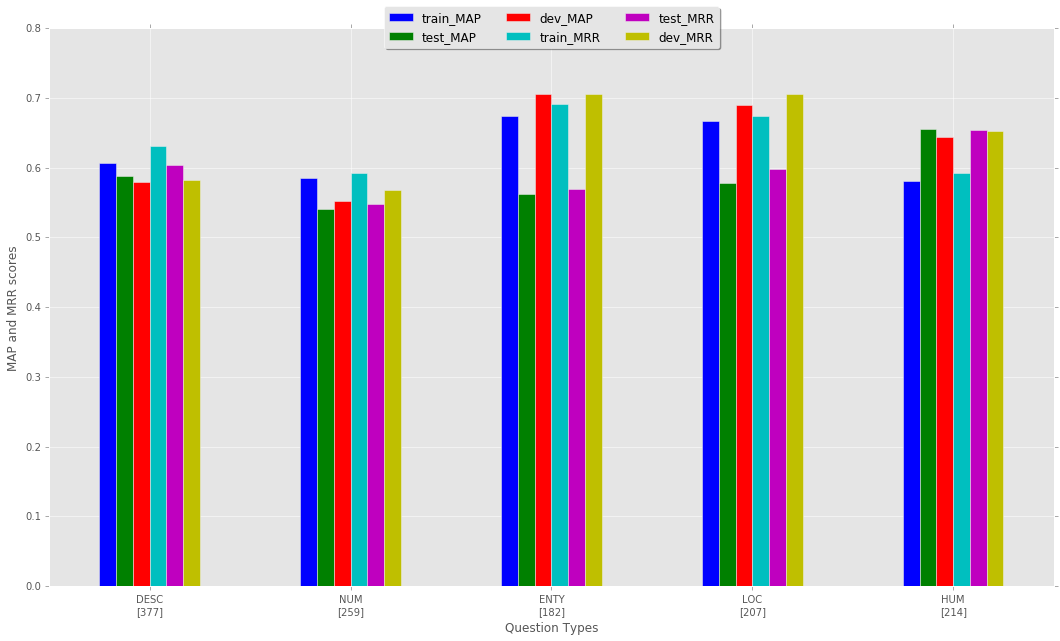

In [175]:
#Evaluating performance based on question classes
def evaluateModel2(features_df):
    evaluation_df = pd.DataFrame(columns = ['QuestionType', 'number_of_questions', 'train_MAP', 'test_MAP', 'dev_MAP', 'train_MRR', 'test_MRR', 'dev_MRR'])
    question_types = features_df['QuestionType'].unique()
    for question_type in question_types:
        row = {}
        #print question_type
        df = features_df[features_df['QuestionType'] == question_type]
        row['QuestionType'] = question_type
        row['number_of_questions'] = len(df.groupby(['QuestionID', 'Type']).size())
        for data_type in ['train', 'test', 'dev']:
            result = evaluateModel(data_type, df)
            row[data_type + '_MAP'] = result['MAP']
            row[data_type + '_MRR'] = result['MRR']
        evaluation_df = evaluation_df.append(pd.DataFrame([row]), ignore_index = True)
    return evaluation_df 

def plotEvaluation():
    evaluation_df = evaluateModel2(features_df)
    plot_df = evaluation_df[['QuestionType', 'train_MAP', 'test_MAP', 'dev_MAP', 'train_MRR', 'test_MRR', 'dev_MRR']]
    #plot_df = evaluation_df[['QuestionType', 'dev_MAP']]
    plot = plot_df.plot(kind='bar', figsize=(18, 10))
    plot.set_title("Plot of Question Type vs. Performance")
    x_tick_labels = plot_df['QuestionType']
    x_tick_labels = [str(x) + "\n[" + str(int(evaluation_df[evaluation_df['QuestionType'] == x]['number_of_questions'])) + "]" for x in x_tick_labels]
    plot.set_xticklabels(x_tick_labels, rotation = 0)
    plt.xlabel('Question Types')
    plt.ylabel('MAP and MRR scores')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
    
plotEvaluation()

In [142]:
evaluation_df = evaluateModel2(features_df)
evaluation_df

,QuestionType,dev_MAP,dev_MRR,number_of_questions,test_MAP,test_MRR,train_MAP,train_MRR
0,LOC,0.769826,0.688373,207,0.732415,0.704304,0.733390,0.663612
1,DESC,0.590932,0.543993,378,0.639210,0.549618,0.634279,0.571906
2,NUM,0.650050,0.628046,259,0.641807,0.618995,0.667713,0.639143
3,ENTY,0.639167,0.632540,183,0.563700,0.515404,0.678337,0.628723
4,HUM,0.655580,0.634233,212,0.713981,0.667560,0.623217,0.594233


In [185]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def getTopicVector(sentence, model, vectorizer):
    #model, vocabulary = buildLDA()
    #vectorizer = CountVectorizer(analyzer='word', vocabulary = vocabulary)
    #sentence = sentence.decode('utf-8','ignore').encode("utf-8")
    #print sentence
    X = vectorizer.fit_transform([sentence])
    topic_vector = model.transform(X)
    return topic_vector

def normalizeVector(vector):
    vector_magnitude = math.sqrt(sum([x * x for x in vector]))
    vector = [x/vector_magnitude for x in vector]
    return vector

def getNextType(current_question_type):
    return 'DESC'
    
def predict_next_sentence(current_question_type, candidate_sentences):
    lda_model = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\LDA\LDA_Model.pkl", "rb"))
    vectorizer = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\LDA\CountVectorizer.pkl", "rb"))
    average_topic_vectors = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\LDA\Average_Topic_Vectors_2.pkl", "rb"))
    next_question_type = getNextType(current_question_type)
    cosine_similarities = []
    for candidate_sentence in candidate_sentences:
        topic_vector = getTopicVector(candidate_sentence, lda_model, vectorizer)
        topic_vector = normalizeVector(topic_vector[0])
        positive_average_vector = np.array(average_topic_vectors[next_question_type][1]).reshape(1, -1)
        topic_vector = np.array(topic_vector).reshape(1, -1)
        positive_similarity = cosine_similarity(positive_average_vector, topic_vector)
        cosine_similarities.append(positive_similarity[0][0])
    
    candidate_sentences = zip(candidate_sentences, cosine_similarities)
    return candidate_sentences

candidate_sentences = features_df.head(10)
candidate_sentences = candidate_sentences['Sentence']
ranked_prediction = np.array(predict_next_sentence('ENTY', candidate_sentences))
ranked_prediction = ranked_prediction[np.argsort(ranked_prediction[:, 1])]
ranked_prediction = ranked_prediction[::-1]  
for i in ranked_prediction[:5]:
    print i[1], i[0]


0.500818930392 measuring spoons
0.500818930392 this tablespoon has a capacity of about 15 ml
0.497452231808 in the us and parts of canada a tablespoon is the largest type of spoon used for eating from a bowl
0.475728756198 a partly submerged glacier cave on perito moreno glacier
0.382735988058 in the uk europe and most commonwealth countries a tablespoon is a type of large spoon usually used for serving


In [180]:
inputString = "Hello my name's ashish's cars'     but -i don't know 100-00 anything"
inputString = ' '.join(inputString.replace("'s", '').split())
inputString = re.sub('[%s]' % re.escape(string.punctuation), '', inputString)
print re.sub( '\s+', ' ', inputString).strip()


Hello my name ashish cars but i dont know 10000 anything


In [191]:
x = 0
if True:
    x = "str"
print x

str


In [194]:
zip([1, 2], [3, 4], [5, 6])

[(1, 3, 5), (2, 4, 6)]

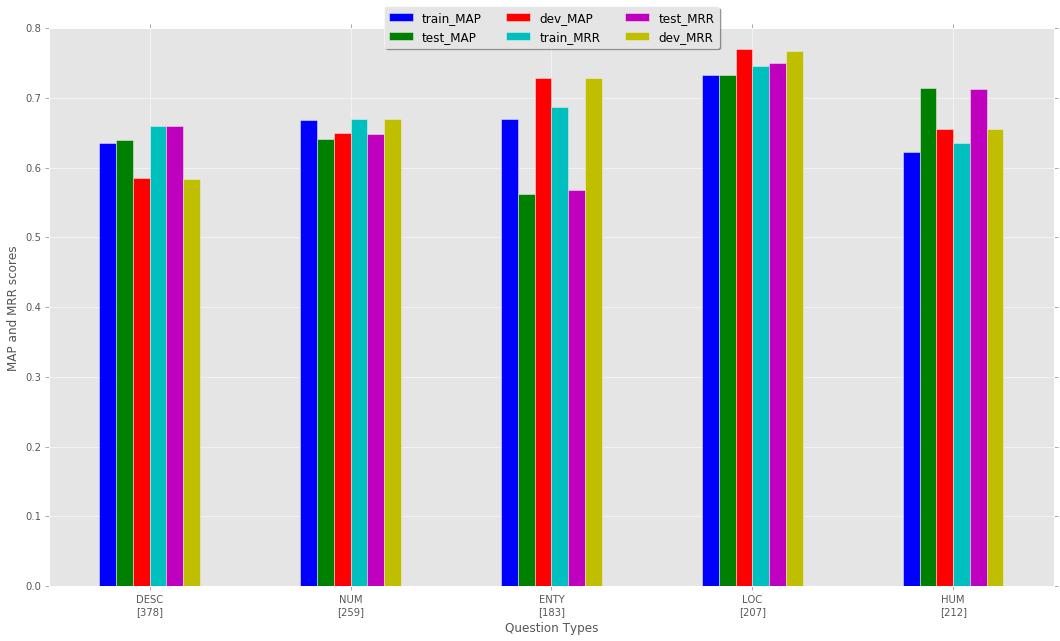

  QuestionType   dev_MAP   dev_MRR  number_of_questions  test_MAP  test_MRR  \
0         DESC  0.585377  0.584083                  378  0.639069  0.659858   
1          NUM  0.650050  0.670290                  259  0.641807  0.648404   
2         ENTY  0.729167  0.729167                  183  0.562273  0.568437   
3          LOC  0.769826  0.766667                  207  0.732415  0.750510   
4          HUM  0.655580  0.655580                  212  0.713981  0.713400   

   train_MAP  train_MRR  
0   0.634874   0.659581  
1   0.667713   0.669459  
2   0.670528   0.687231  
3   0.733390   0.745532  
4   0.623217   0.635530  


In [195]:
import string, re
import nltk
import math
from sets import Set
from sklearn.linear_model import LogisticRegression
import time
from sklearn.externals import joblib
import gensim
import operator
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import time
from nltk.corpus import wordnet as wn
import lda
import lda.datasets
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import math
import warnings
import pickle
from sklearn.preprocessing import Imputer


#%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LogisticRegression

#Train the model on Logistic Regression
def buildModel(data_type, features_df, flag):
    features = ['UnigramCount', 'BigramCount', 'TrigramCount', 'LemmaCount', 'IDFUnigramCount']
    features = features + ['SynonymCount', 'AntonymCount', 'HypernymCount', 'HyponymCount']
    features = features + ['LevenshteinEditDistance']
    if flag == 1:
        features = features + ['PositiveSimilarity', 'NegativeSimilarity']
    
    X_Train = features_df[features][features_df['Type'] == 'train']
    y_Train = features_df['Label'][features_df['Type'] == 'train']

    model = LogisticRegression()
    model = model.fit(X_Train, y_Train)

    #Test Set
    X_Test = features_df[features][features_df['Type'] == data_type]
    y_Test = features_df['Label'][features_df['Type'] == data_type]

    #y_Test_Predicted = model.predict(X_Test)
    y_Test_Predicted_Probabilites = model.predict_proba(X_Test)
    return y_Test_Predicted_Probabilites


#Calculate MRR
def getMRR(df):
    question_ids = df['QuestionID'].unique()
    rankSum = 0
    for qid in question_ids:
        proba_list = df[df['QuestionID'] == qid]['Probability'].tolist()
        label_list = df[df['QuestionID'] == qid]['Label'].tolist()
        lst = zip(proba_list, label_list)
        lst = np.array(lst)
        lst = lst[np.argsort(lst[:, 0])]
        lst = lst[::-1]
        for i in range(len(lst)):
            if lst[i][1] == 1:
                rankSum = rankSum + (1/ float(i + 1))
                break
                #print qid, i + 1
    mean_reciprocal_rank = rankSum/ float(len(question_ids))
    #mrr = rankSum/ float(len(question_ids))
    return mean_reciprocal_rank

#Calculate MAP
def getMAP(df):
    question_ids = df['QuestionID'].unique()
    average_precision_measures = []
    for qid in question_ids:
        proba_list = df[df['QuestionID'] == qid]['Probability'].tolist()
        label_list = df[df['QuestionID'] == qid]['Label'].tolist()
        lst = zip(proba_list, label_list)
        lst = np.array(lst)
        lst = lst[np.argsort(lst[:, 0])]
        lst = lst[::-1]
        no_of_positives = 0
        no_of_documents = 0
        precision_measures = []
        for i in range(len(lst)):
            no_of_documents = no_of_documents + 1
            if lst[i][1] == 1:
                no_of_positives = no_of_positives + 1
                precision = no_of_positives / float(no_of_documents)
                precision_measures.append(precision)
                #print qid, i + 1
        average_precision = np.mean(precision_measures)
        #print precision_measures, average_precision
        average_precision_measures.append(average_precision)
    mean_average_precision = np.mean(average_precision_measures)
    #mrr = rankSum/ float(len(question_ids))
    return mean_average_precision

def evaluateModel(data_type, features_df, question_type):
    flag = 1
    if question_type == 'ENTY':
        flag = 0
    y_Test_Predicted_Probabilites = buildModel(data_type, features_df, flag)
    df1 = features_df[features_df['Type'] == data_type]
    df1 = df1.reset_index(drop=True)
    df1 = df1[['QuestionID', 'SentenceID', 'Label', 'Type']]
    df2 = pd.Series(y_Test_Predicted_Probabilites[:, 1], name='Probability')
    df = pd.concat([df1, df2], axis = 1)
    """
    print "Mean Reciprocal Rank : ", getMRR(df)
    print "Mean Average Precision : ", getMAP(df)
    """
    return {'MAP' : getMAP(df), 'MRR' : getMRR(df)}
    

"""print "Dev\t:", evaluateModel('dev', features_df)
print "Test\t:", evaluateModel('test', features_df)
print "Train\t:", evaluateModel('train', features_df)"""

#Evaluating performance based on question classes
def evaluateModel2(features_df):
    evaluation_df = pd.DataFrame(columns = ['QuestionType', 'number_of_questions', 'train_MAP', 'test_MAP', 'dev_MAP', 'train_MRR', 'test_MRR', 'dev_MRR'])
    question_types = features_df['QuestionType'].unique()
    for question_type in question_types:
        row = {}
        #print question_type
        df = features_df[features_df['QuestionType'] == question_type]
        row['QuestionType'] = question_type
        row['number_of_questions'] = len(df.groupby(['QuestionID', 'Type']).size())
        for data_type in ['train', 'test', 'dev']:
            result = evaluateModel(data_type, df, question_type)
            row[data_type + '_MAP'] = result['MAP']
            row[data_type + '_MRR'] = result['MRR']
        evaluation_df = evaluation_df.append(pd.DataFrame([row]), ignore_index = True)
    return evaluation_df 

def plotEvaluation():
    features_df = pd.read_table('C:\Users\JareD\Major Project\EvenSem\Data\DataSet_Feature_Extraction_3.tsv')
    evaluation_df = evaluateModel2(features_df)
    plot_df = evaluation_df[['QuestionType', 'train_MAP', 'test_MAP', 'dev_MAP', 'train_MRR', 'test_MRR', 'dev_MRR']]
    #plot_df = evaluation_df[['QuestionType', 'dev_MAP']]
    plot = plot_df.plot(kind='bar', figsize=(18, 10))
    plot.set_title("Plot of Question Type vs. Performance")
    x_tick_labels = plot_df['QuestionType']
    x_tick_labels = [str(x) + "\n[" + str(int(evaluation_df[evaluation_df['QuestionType'] == x]['number_of_questions'])) + "]" for x in x_tick_labels]
    plot.set_xticklabels(x_tick_labels, rotation = 0)
    plt.xlabel('Question Types')
    plt.ylabel('MAP and MRR scores')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
    plt.show()
    print evaluation_df


plotEvaluation()

In [196]:
evaluation_df = evaluateModel2(features_df)
evaluation_df

,QuestionType,dev_MAP,dev_MRR,number_of_questions,test_MAP,test_MRR,train_MAP,train_MRR
0,DESC,0.585377,0.584083,378,0.639069,0.659858,0.634874,0.659581
1,NUM,0.650050,0.670290,259,0.641807,0.648404,0.667713,0.669459
2,ENTY,0.729167,0.729167,183,0.562273,0.568437,0.670528,0.687231
3,LOC,0.769826,0.766667,207,0.732415,0.750510,0.733390,0.745532
4,HUM,0.655580,0.655580,212,0.713981,0.713400,0.623217,0.635530
